
<a href="https://colab.research.google.com/github/aleylani/Databehandling-AI24/blob/main/exercises/E3_merging.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Merging exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations**, **data cleaning**, **merging**, **concatenation**, **joining**, **parse html tables** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

**Note that you might need to install lxml in your environment**

## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

          Note that you might need to install lxml in your environment

          conda install lxml

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

swedish_demo = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=",")

In [64]:
# a

swedish_df = pd.DataFrame(swedish_demo[6])
swedish_df["Total fertilitet"] = pd.to_numeric(swedish_df["Total fertilitet"]) / 100
swedish_df.columns = ["År", "Folkmängd", "Födda", "Döda", "Naturlig befolkningsförändering", "Nativitet (per 1000)", "Dödstal (per 1000)", "Naturlig befolkningsförändering (per 1000)", "Total fertilitet"]
swedish_df["Nativitet (per 1000)"] = pd.to_numeric(swedish_df["Nativitet (per 1000)"]) / 10
swedish_df["Naturlig befolkningsförändering (per 1000)"] = pd.to_numeric(swedish_df["Naturlig befolkningsförändering (per 1000)"]) / 10
swedish_df["Dödstal (per 1000)"] = pd.to_numeric(swedish_df["Dödstal (per 1000)"]) / 10

swedish_df["Folkmängd"] = swedish_df["Folkmängd"].str.replace(r'\xa0', '', regex=True)  
swedish_df["Folkmängd"] = swedish_df["Folkmängd"].str.replace(",", ".", regex=True)  
swedish_df["Folkmängd"] = swedish_df["Folkmängd"].str.replace(" ", "", regex=True)  

swedish_df["Folkmängd"] = swedish_df["Folkmängd"].astype(float)
swedish_df

,År,Folkmängd,Födda,Döda,Naturlig befolkningsförändering,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändering (per 1000),Total fertilitet
0,1900,5117000.0,138 139,86 146,51 993,27.0,16.8,10.2,4.02
1,1901,5156000.0,139 370,82 772,56 598,27.0,16.1,11.0,4.04
2,1902,5187000.0,137 364,79 722,57 642,26.5,15.4,11.1,3.95
3,1903,5210000.0,133 896,78 610,55 286,25.7,15.1,10.6,3.82
4,1904,5241000.0,134 952,80 152,54 800,25.7,15.3,10.5,3.83
...,...,...,...,...,...,...,...,...,...
118,2018,10175213.5,115 832,92 185,23 647,11.3,9.0,2.3,1.75
119,2019,10278887.0,114 523,88 766,28 727,11.1,8.7,2.4,1.70
120,2020,10353442.0,113 077,98 124,14 953,10.9,9.5,1.4,1.66
121,2021,10415810.5,114 263,91 958,22 305,11.0,8.8,2.2,NaN


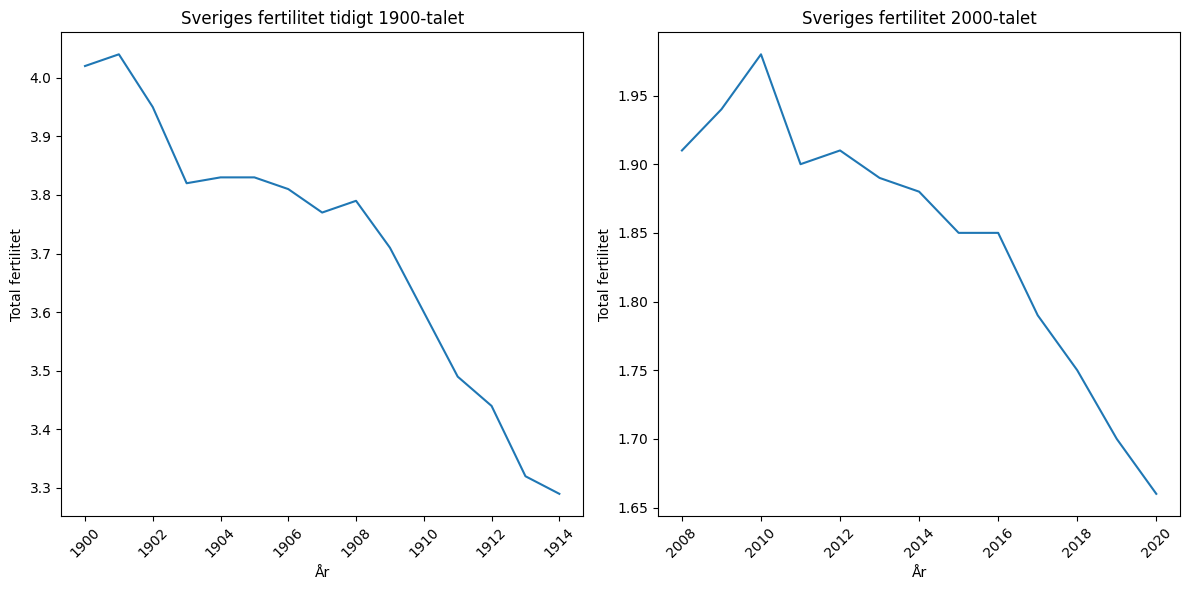

In [65]:
# b

sweden_early_1900 = swedish_df["År"].head(15)
sweden_early_fertility = swedish_df["Total fertilitet"].head(15)

sweden_in_2000 = swedish_df["År"].tail(15)
sweden_2000_fertility = swedish_df["Total fertilitet"].tail(15)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=swedish_df, x=sweden_early_1900, y=sweden_early_fertility, ax=axes[0])
axes[0].set_title("Sveriges fertilitet tidigt 1900-talet")
axes[0].tick_params(axis="x", rotation=45)

sns.lineplot(data=swedish_df, x=sweden_in_2000, y=sweden_2000_fertility, ax=axes[1])
axes[1].set_title("Sveriges fertilitet 2000-talet")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [66]:
# c

before_1900_df = pd.DataFrame(swedish_demo[1])
before_1900_df.columns = before_1900_df.columns.droplevel(0)
before_1900_df.columns = ["År", "Folkmängd", "Totalt", "Promille"]
before_1900_df["Promille"] = pd.to_numeric(before_1900_df["Promille"], errors="coerce") / 100
before_1900_df = before_1900_df[:-1]

before_1900_df["År"] = pd.to_numeric(before_1900_df["År"], errors="coerce").astype(int)
before_1900_df["Folkmängd"] = before_1900_df["Folkmängd"].str.replace(r'\xa0', '', regex=True)  
before_1900_df["Folkmängd"] = before_1900_df["Folkmängd"].str.replace(",", ".", regex=True) 
before_1900_df["Folkmängd"] = before_1900_df["Folkmängd"].astype(float)

before_1900_filter = before_1900_df[before_1900_df["År"].between(1570, 1865)]
before_1900_new_df = before_1900_filter[["År", "Folkmängd"]].copy()
before_1900_new_df

,År,Folkmängd
0,1570,900000.0
1,1650,1225000.0
2,1700,1485000.0
3,1720,1350000.0
4,1755,1878000.0
5,1815,2465000.0
6,1865,4099000.0


In [67]:
# d

both_df = pd.concat([before_1900_new_df, swedish_df]).reset_index(drop=True)

both_df

,År,Folkmängd,Födda,Döda,Naturlig befolkningsförändering,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändering (per 1000),Total fertilitet
0,1570,900000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1650,1225000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1700,1485000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720,1350000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1755,1878000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
125,2018,10175213.5,115 832,92 185,23 647,11.3,9.0,2.3,1.75
126,2019,10278887.0,114 523,88 766,28 727,11.1,8.7,2.4,1.70
127,2020,10353442.0,113 077,98 124,14 953,10.9,9.5,1.4,1.66
128,2021,10415810.5,114 263,91 958,22 305,11.0,8.8,2.2,NaN


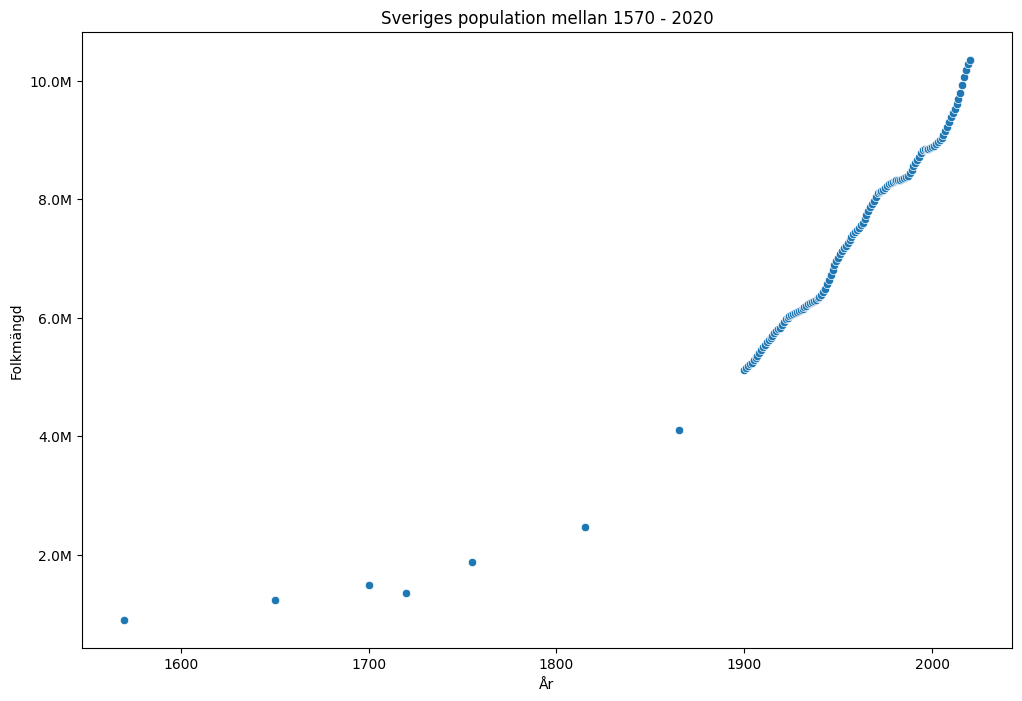

In [68]:
# e
import matplotlib.ticker as ticker

both_df = both_df[both_df["År"].between(1570, 2020)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=both_df, x="År", y="Folkmängd")
def format_func(value, tick_number):
    return f"{float(value / 1000000)}M"
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
plt.title("Sveriges population mellan 1570 - 2020")
plt.show()

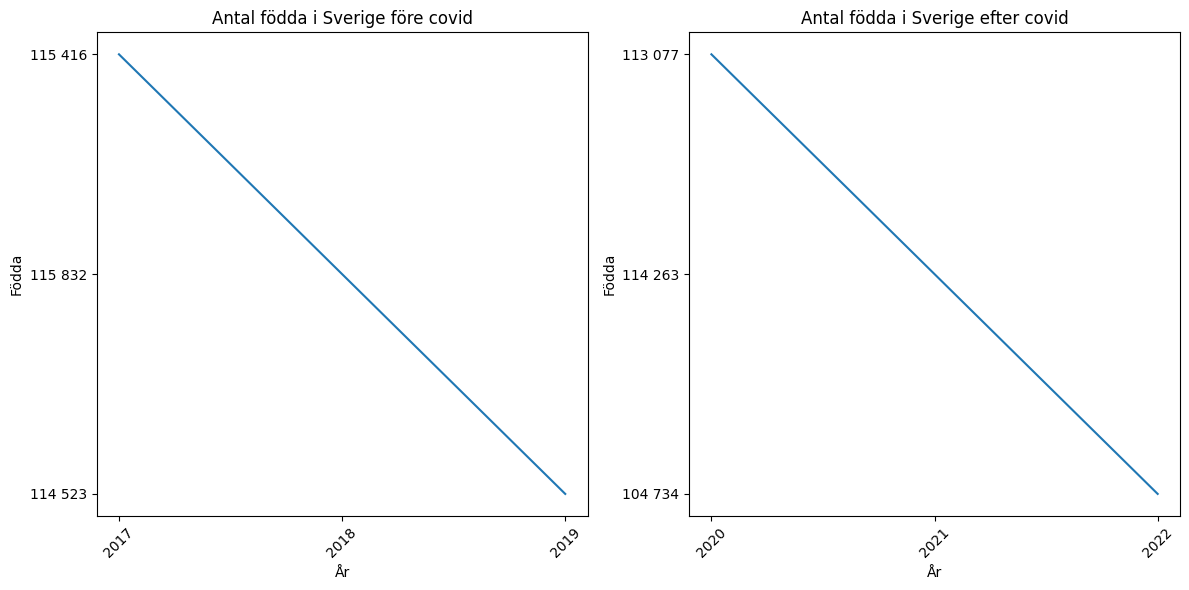

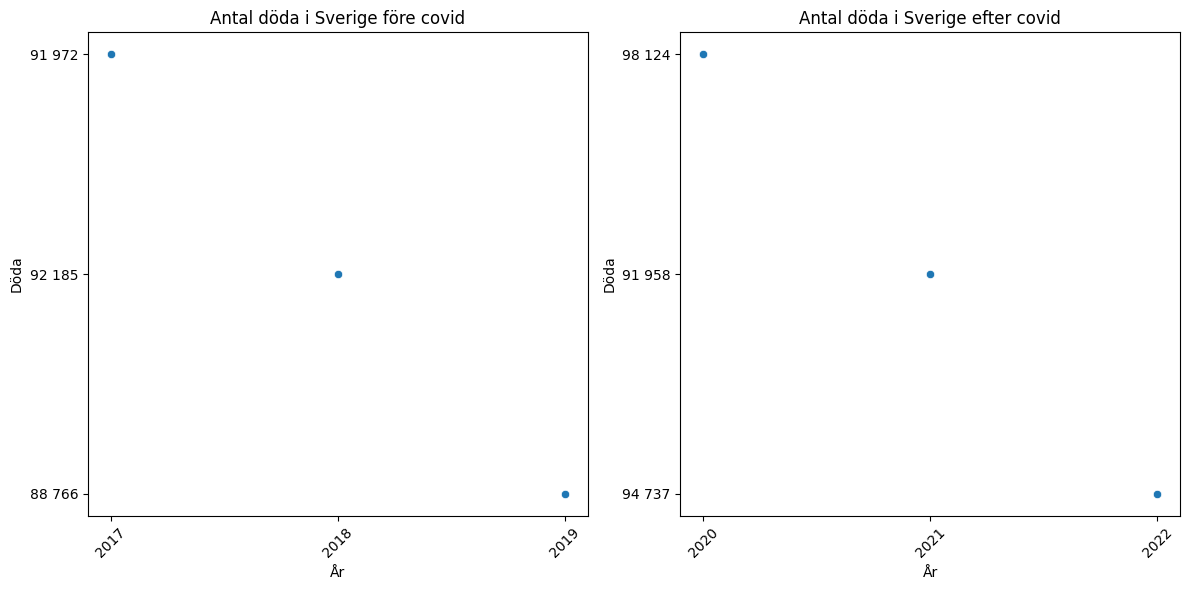

In [69]:
# f

covid_filter = swedish_df["År"].between(2020, 2022)
before_covid_filter = swedish_df["År"].between(2017, 2019)
covid_time_df = swedish_df[covid_filter]
before_covid_df = swedish_df[before_covid_filter]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=before_covid_df, x="År", y="Födda", ax=axes[0])
axes[0].set_title("Antal födda i Sverige före covid")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_xticks([2017, 2018, 2019])

sns.lineplot(data=covid_time_df, x="År", y="Födda", ax=axes[1])
axes[1].set_title("Antal födda i Sverige efter covid")
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_xticks([2020, 2021, 2022])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=before_covid_df, x="År", y="Döda", ax=axes[0])
axes[0].set_title("Antal döda i Sverige före covid")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_xticks([2017, 2018, 2019])

sns.scatterplot(data=covid_time_df, x="År", y="Döda", ax=axes[1])
axes[1].set_title("Antal döda i Sverige efter covid")
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_xticks([2020, 2021, 2022])

plt.tight_layout()
plt.show()

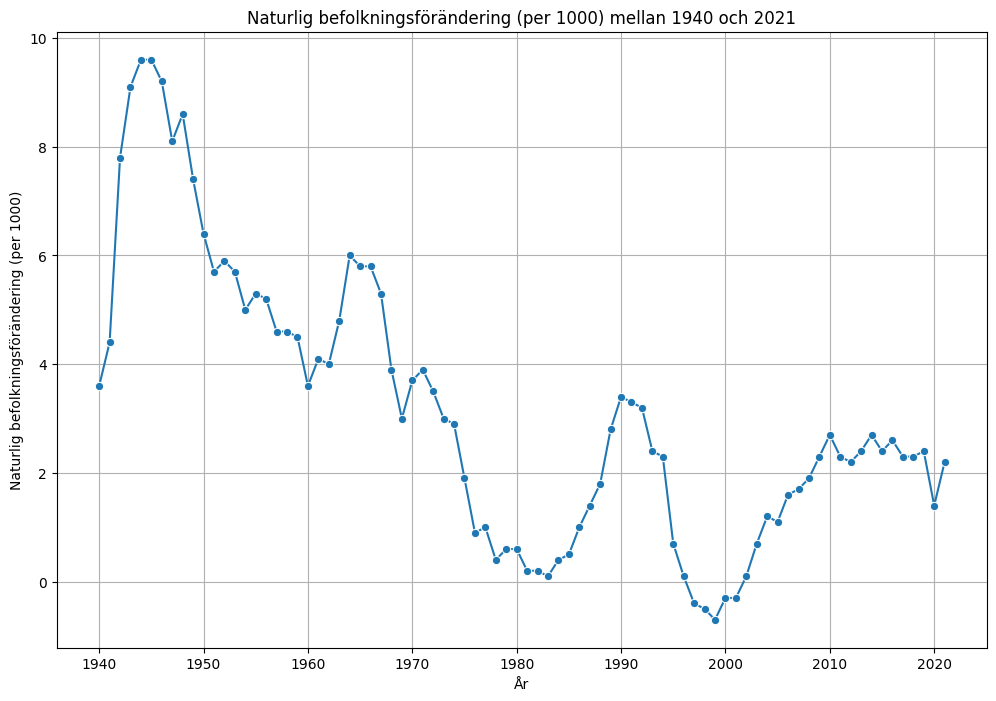

In [84]:
# g

pop_change_filer = swedish_df["År"].between(1940, 2021)
pop_change = swedish_df[pop_change_filer]

plt.figure(figsize=(12, 8))
sns.lineplot(data=pop_change, x="År", y="Naturlig befolkningsförändering (per 1000)", marker="o")
plt.title("Naturlig befolkningsförändering (per 1000) mellan 1940 och 2021")
plt.grid(True)
plt.show()

/var/folders/c7/mgs83rk93617s2n5004mpjzm0000gn/T/ipykernel_56915/4203928449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_change_sampled["Naturlig befolkningsförändering"] = pd.to_numeric(


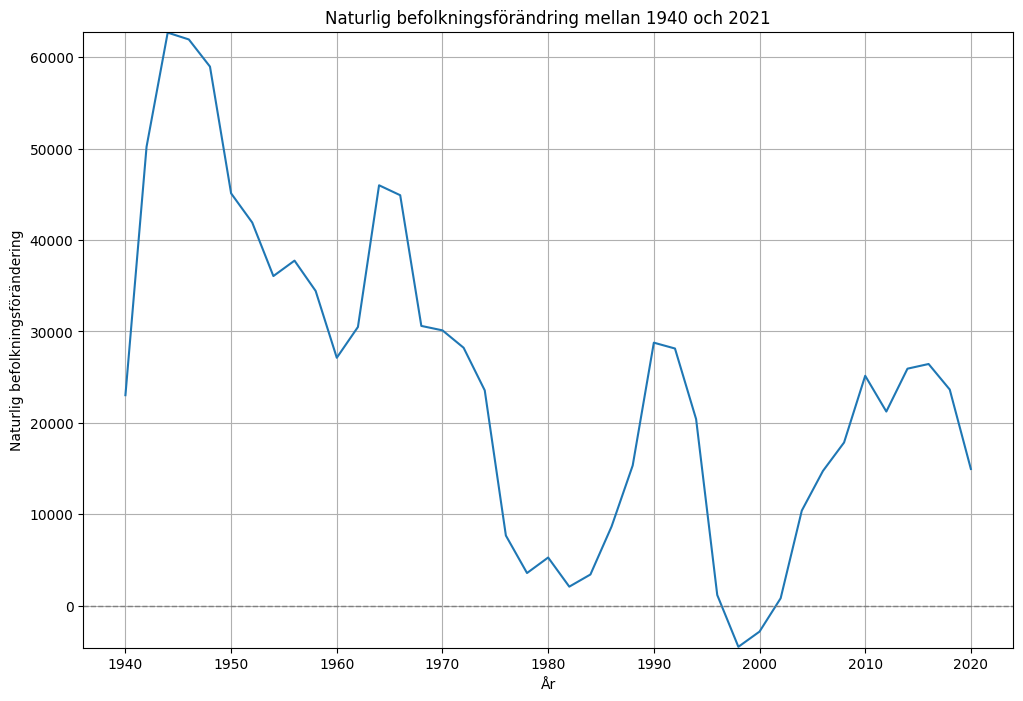

In [123]:
# h

pop_change_sampled = pop_change.iloc[::2]
pop_change_sampled["Naturlig befolkningsförändering"] = pd.to_numeric(
    pop_change_sampled["Naturlig befolkningsförändering"].str.replace(" ", "").str.replace(",", "."), 
    errors="coerce"
)

plt.figure(figsize=(12, 8))
sns.lineplot(data=pop_change_sampled, x="År", y="Naturlig befolkningsförändering")

plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.title("Naturlig befolkningsförändring mellan 1940 och 2021")
plt.ylim(pop_change_sampled["Naturlig befolkningsförändering"].min() - 100,
         pop_change_sampled["Naturlig befolkningsförändering"].max() + 100)
plt.grid(True)
plt.show()

---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


In [198]:
# a

df = pd.read_html("https://da.wikipedia.org/wiki/Danmarks_demografi")
df = df[0]

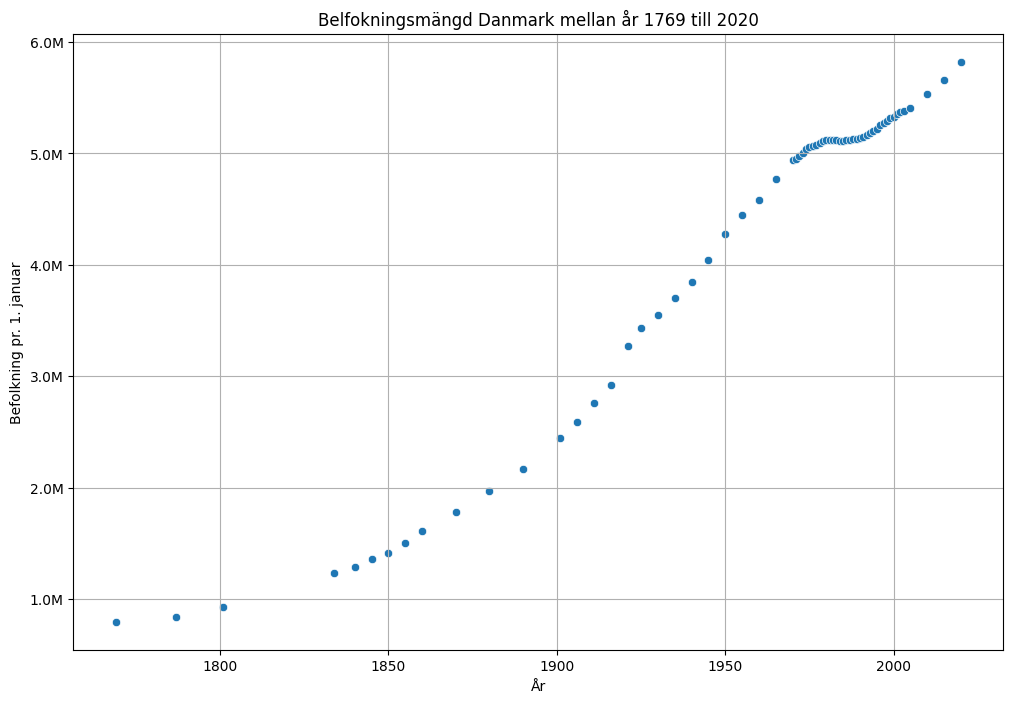

In [199]:
# b

df_1 = df.iloc[:, [0,1]]
df_2 = df.iloc[:, [2,3]]
df_2.columns = ["År", "Befolkning pr. 1. januar"]
df_2 = df_2.iloc[2:]
frames = [df_1, df_2]
denmark_df = pd.concat(frames)
denmark_df["År"] = denmark_df["År"].astype("int64")
denmark_df["Befolkning pr. 1. januar"] = denmark_df["Befolkning pr. 1. januar"].replace(to_replace=["500.000[7]", "1.000.000[7]"], value=["500.000", "1.000.000"])
denmark_df["Befolkning pr. 1. januar"]= denmark_df["Befolkning pr. 1. januar"].str.replace(".", "")
denmark_df["Befolkning pr. 1. januar"] = denmark_df["Befolkning pr. 1. januar"].astype(int)

denmark_filter = denmark_df["År"].between(1769,2020) 
denmark_1769_to_2020 = denmark_df[denmark_filter].reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=denmark_1769_to_2020, x="År", y="Befolkning pr. 1. januar")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))
plt.grid(True)
plt.title("Belfokningsmängd Danmark mellan år 1769 till 2020")
plt.show()

---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.

<details>

<summary>Answer</summary>

![Fertilitet Norge och Sverige](../assets/fertilitet_sv_no.png)

![Folkmängd Norge och Sverige](../assets/folkmangd_sverige_norge.png)

</details>